<a href="https://colab.research.google.com/github/crispitagorico/sigoptim/blob/main/MeanVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let $P$ be a portfolio of assets $A_1,...,A_N$ with weights $\mathbf w = (w_1,...,w_N) \in \mathbb{R}^N$ and (random) returns $\mathbf r = (r_1,...,r_N) \in \mathbb{R}^N$. 

The portfolio total expected P&L is given by
$$\mathbf w^\top \mathbb E[\mathbf r] = \sum_{i=1}^N w_i \mathbb E[r_i].$$

Let $\Sigma = \mathbb E[(\mathbf r - \mathbb E[\mathbf r])(\mathbf r - \mathbb E[\mathbf r])^\top]$ be the covariance matrix of the returns.

The portfolio total risk is given by
$$\mathbf w^\top \Sigma \mathbf w = \sum_{i,j=1}^N w_i\Sigma_{i,j}w_j.$$

The mean-variance optimisation problem is formulated as follows
$$\min_{\mathbf w} \mathbf w^\top \Sigma \mathbf w \quad \text{ subject to } \ \mathbf w^\top \mathbb E[\mathbf r] = \mu, \ \sum_{i=1}^Nw_i=1 \ \text{ and } \ 0 \leq w_i \leq 1,$$

where $\lambda \in [0,\infty)$ is a risk tolerance parameter.

In [2]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt

In [267]:
def mean_variance_optim(expected_returns, covariance_matrix_returns, expected_pnl):

    # initialise weights
    N = expected_returns.size
    w0 = np.ones(N)

    # objective
    objective = lambda w: np.matmul(w.T, np.matmul(covariance_matrix_returns, w))

    # constraints
    bnds = tuple(N*[(0., 1.)])
    cons = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
            {'type': 'eq', 'fun': lambda w: np.matmul(w.T, expected_returns) - expected_pnl})

    # run optimisation
    optim = scipy.optimize.minimize(fun=objective, x0=w0, bounds=bnds, constraints=cons)

    # return optimal weights 
    return optim.x

In [270]:
# number of assets
N = 10

# stocks
df      = pd.read_csv('stocks.csv')
names   = df.columns[1:N+1].to_list()
prices  = df.iloc[-40:, 1:N+1].to_numpy()
returns = np.diff(prices, axis=0)

# expected returns
expected_returns = np.mean(returns, axis=0)

# covariance matrix of returns
covariance_matrix_returns = np.cov(returns, rowvar=False)

# expected portfolio returns
expected_pnls = np.linspace(0.01, 2, 50)

# optimal weights for given expected returns
optimal_weights = [mean_variance_optim(expected_returns, covariance_matrix_returns, pnl) for pnl in expected_pnls]

# actual portfolio P&L
pnls = [np.matmul(w.T, expected_returns) for w in optimal_weights]

# portfolio risk
risks = [np.matmul(w.T, np.matmul(covariance_matrix_returns, w)) for w in optimal_weights]

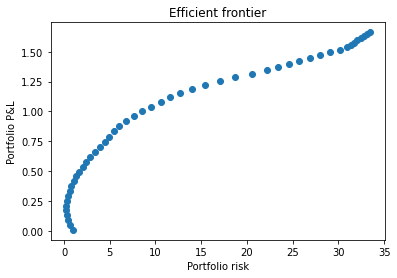

In [280]:
plt.scatter(risks, pnls)
plt.xlabel('Portfolio risk')
plt.ylabel('Portfolio P&L')
plt.title('Efficient frontier')
plt.show()